In [ ]:
from dataset import *
from constraints import *

In [ ]:
def plot_raster(units: list[int],
                stimulus_name: str,
                session: Session = CURRENT_SESSION,
                window: tuple[float, float] = (-0.5, 1.0),
                n_presentations: int = 10,
                line_height: float = 0.8,    # thinner lines
                row_spacing: float = 0.4):   # less vertical spacing
    """
    Plot a compact raster for the given unit ids aligned to the given stimulus.

    Args:
        units: List of unit ids.
        stimulus_name: Stimulus to align to.
        session: AllenSDK session.
        window: Time window around stimulus onset to show (in seconds).
        n_presentations: Number of stimulus repetitions to show per unit.
        line_height: Height of each spike line.
        row_spacing: Vertical spacing between trials.
    """
    df = get_presentationwise_spike_times(
        session=session,
        stimulus_name=stimulus_name,
        unit_ids=units
    )

    df = df[
        (df["time_since_stimulus_presentation_onset"] >= window[0]) &
        (df["time_since_stimulus_presentation_onset"] <= window[1])
    ]

    df = df.sort_values(by=["unit_id", "stimulus_presentation_id", "time_since_stimulus_presentation_onset"])

    fig, ax = plt.subplots(figsize=(10, len(units) * n_presentations * row_spacing * 0.1))

    yticks = []
    yticklabels = []

    y = 0
    for unit_id in units:
        unit_spikes = df[df.unit_id == unit_id]
        presentations = unit_spikes["stimulus_presentation_id"].unique()[:n_presentations]
        for pres_id in presentations:
            spikes = unit_spikes[unit_spikes.stimulus_presentation_id == pres_id]
            times = spikes["time_since_stimulus_presentation_onset"].values
            ax.vlines(times, y, y + line_height, color='black', linewidth=0.5)
            y += row_spacing
        yticks.append(y - (n_presentations * row_spacing) / 2)
        yticklabels.append(f"Unit {unit_id}")

    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    ax.set_xlabel("Time from stimulus onset (s)")
    ax.set_ylabel("Neuron / Trial")
    ax.set_title(f"Raster plot for stimulus: {stimulus_name}")
    ax.axvline(0, color='red', linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.show()


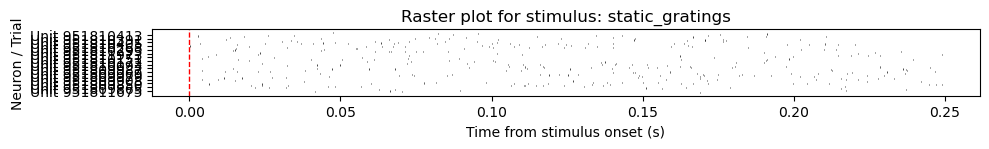

In [12]:
# Choose some units from VISp
visp_units = get_unit_ids(ecephys_structure_acronym='CA1')
plot_raster(units=list(visp_units), stimulus_name='static_gratings')
